In [51]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor  
from sklearn.tree import plot_tree 

In [52]:
dataFULL = pd.read_csv('C:\\Users\\erenh\\Desktop\\datasets\\Melbourne_housing_FULL.csv')
dataLESS = pd.read_csv('C:\\Users\\erenh\\Desktop\\datasets\\MELBOURNE_HOUSE_PRICES_LESS.csv')
dataFULL.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [53]:
dataLESS.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [54]:
dataFULL.shape

(34857, 21)

In [55]:
dataLESS.shape

(63023, 13)

In [56]:
dataFULL.isna().sum() 


Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [57]:
dataLESS.isna().sum()


Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [58]:
data = dataFULL
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [59]:
data.shape

(34857, 21)

In [60]:
data.drop_duplicates()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [61]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [62]:
print("Toplam Sütun Sayısı:", len(data.columns))
print("Bellek Kullanımı:", data.memory_usage().sum() / 1024, "KB")
print("Her Sütundaki Hücre Sayısı (Null Olmayan Değerler):",data.count())

Toplam Sütun Sayısı: 21
Bellek Kullanımı: 5718.8515625 KB
Her Sütundaki Hücre Sayısı (Null Olmayan Değerler): Suburb           34857
Address          34857
Rooms            34857
Type             34857
Price            27247
Method           34857
SellerG          34857
Date             34857
Distance         34856
Postcode         34856
Bedroom2         26640
Bathroom         26631
Car              26129
Landsize         23047
BuildingArea     13742
YearBuilt        15551
CouncilArea      34854
Lattitude        26881
Longtitude       26881
Regionname       34854
Propertycount    34854
dtype: int64


In [63]:
print("Sıra Aralığı (Range Index):", data.index)

Sıra Aralığı (Range Index): RangeIndex(start=0, stop=34857, step=1)


In [64]:
kategorik_veriler = ['Suburb','Address','Type','Method','Date','SellerG','Regionname','CouncilArea'] 
#Diğer verilerin konması mantıklı bulunmamıştır

In [65]:
for column in kategorik_veriler:
    data[column] = data[column].fillna(data[column].mode().iloc[0]) 

In [66]:
data.loc[data.Price.isna()]    

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.79960,144.99890,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34829,West Melbourne,9/11 Anderson St,3,u,NaN,S,hockingstuart,24/02/2018,3.1,3003.0,...,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Northern Metropolitan,2230.0
34834,Wheelers Hill,112 Jells Rd,4,h,NaN,PN,Harcourts,24/02/2018,16.7,3150.0,...,2.0,2.0,714.0,NaN,NaN,Monash City Council,-37.90287,145.19011,South-Eastern Metropolitan,7392.0
34835,Wheelers Hill,20 Mill Ct,3,h,NaN,S,Barry,24/02/2018,16.7,3150.0,...,2.0,2.0,677.0,NaN,NaN,Monash City Council,-37.91905,145.19105,South-Eastern Metropolitan,7392.0
34845,Windsor,13 Mary St,4,h,NaN,W,Jellis,24/02/2018,4.6,3181.0,...,3.0,2.0,279.0,237.0,2009.0,Port Phillip City Council,-37.85418,144.99697,Southern Metropolitan,4380.0


In [67]:
data.Method.value_counts()

S     19744
SP     5095
PI     4850
VB     3108
SN     1317
PN      308
SA      226
W       173
SS       36
Name: Method, dtype: int64

In [68]:
data.loc[data.Method == 'PN']    

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
207,Alphington,4/5 Chandler Hwy,4,t,NaN,PN,Nelson,13/08/2016,6.4,3078.0,...,NaN,NaN,NaN,NaN,NaN,Darebin City Council,NaN,NaN,Northern Metropolitan,2211.0
305,Altona North,29a The Broadway,4,t,NaN,PN,Williams,7/11/2016,11.1,3025.0,...,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,5132.0
309,Altona North,45 Freemans Rd,4,h,NaN,PN,hockingstuart,10/12/2016,11.1,3025.0,...,2.0,5.0,537.0,196.0,1960.0,Hobsons Bay City Council,-37.82610,144.83910,Western Metropolitan,5132.0
830,Balaclava,5/60 Gourlay St,2,u,NaN,PN,Gary,14/05/2016,6.6,3183.0,...,1.0,1.0,0.0,60.0,1960.0,Port Phillip City Council,-37.87250,144.99790,Southern Metropolitan,2952.0
922,Balwyn,1b Threadneedle St,2,h,NaN,PN,Fletchers,14/05/2016,9.7,3103.0,...,3.0,2.0,344.0,NaN,NaN,Boroondara City Council,-37.81180,145.09950,Southern Metropolitan,5682.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34622,Port Melbourne,506/89 Beach St,2,u,NaN,PN,Biggin,24/02/2018,3.5,3207.0,...,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Southern Metropolitan,8648.0
34745,Strathmore,2/11 Roslyn St,3,u,NaN,PN,Marvelli,24/02/2018,8.2,3041.0,...,NaN,NaN,NaN,NaN,NaN,Moonee Valley City Council,NaN,NaN,Western Metropolitan,3284.0
34765,Sunshine West,1 Warmington Rd,3,h,NaN,PN,FN,24/02/2018,10.5,3020.0,...,1.0,3.0,541.0,109.0,1972.0,Brimbank City Council,-37.80095,144.82840,Western Metropolitan,6763.0
34795,Toorak,10 Balfour St,3,h,NaN,PN,RT,24/02/2018,4.1,3142.0,...,2.0,2.0,375.0,266.0,1970.0,Stonnington City Council,-37.83692,145.02351,Southern Metropolitan,7217.0


In [69]:
data.loc[data.Method == 'SN']   
#satıldı ve açıklanmadı yani bilgimiz yok 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0
139,Albert Park,9 Boyd St,3,h,NaN,SN,Greg,6/08/2016,3.3,3206.0,...,2.0,1.0,336.0,145.0,1890.0,Port Phillip City Council,-37.84710,144.95610,Southern Metropolitan,3280.0
150,Albert Park,5 Withers St,3,h,NaN,SN,Marshall,10/09/2016,3.3,3206.0,...,1.0,0.0,126.0,88.0,1910.0,Port Phillip City Council,-37.84270,144.95150,Southern Metropolitan,3280.0
169,Albert Park,18 Herbert St,3,h,NaN,SN,Cayzer,19/11/2016,3.3,3206.0,...,1.0,0.0,169.0,NaN,NaN,Port Phillip City Council,-37.84480,144.95780,Southern Metropolitan,3280.0
175,Albert Park,143 Kerferd Rd,7,h,NaN,SN,hockingstuart,24/09/2016,3.3,3206.0,...,7.0,0.0,435.0,NaN,NaN,Port Phillip City Council,-37.84730,144.95390,Southern Metropolitan,3280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34561,Murrumbeena,12 Wahroongaa Cr,3,h,NaN,SN,Ray,24/02/2018,10.1,3163.0,...,2.0,3.0,741.0,NaN,NaN,Glen Eira City Council,-37.88757,145.07290,Southern Metropolitan,4442.0
34654,Reservoir,32 Epstein St,4,h,NaN,SN,McGrath,24/02/2018,12.0,3073.0,...,1.0,2.0,453.0,98.0,1950.0,Darebin City Council,-37.70867,144.99342,Northern Metropolitan,21650.0
34734,St Kilda,60 Chaucer St,3,h,NaN,SN,Wilson,24/02/2018,5.0,3182.0,...,2.0,2.0,269.0,120.0,1910.0,Port Phillip City Council,-37.87101,144.97957,Southern Metropolitan,13240.0
34779,Templestowe Lower,11/231 High St,3,u,NaN,SN,Woodards,24/02/2018,12.4,3107.0,...,NaN,NaN,NaN,NaN,NaN,Manningham City Council,NaN,NaN,Eastern Metropolitan,5420.0


In [70]:
data.loc[data.Method == 'SS']
#SS - sold after auction price not disclosed.
#açık arttırma sonrası satılan fiyat açıklanmadı yani bilgimiz yok 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1148,Balwyn North,65 Sylvander St,4,h,NaN,SS,RT,22/08/2016,9.2,3104.0,...,2.0,2.0,628.0,239.0,1940.0,Boroondara City Council,-37.78680,145.09430,Southern Metropolitan,7809.0
1450,Bentleigh East,1/932 Centre Rd,4,t,NaN,SS,Ray,12/11/2016,13.9,3165.0,...,NaN,NaN,NaN,NaN,NaN,Glen Eira City Council,NaN,NaN,Southern Metropolitan,10969.0
1953,Brighton East,246a Were St,3,h,NaN,SS,Marshall,3/09/2016,10.7,3187.0,...,2.0,2.0,329.0,203.0,1998.0,Bayside City Council,-37.92760,145.01550,Southern Metropolitan,6938.0
3721,Eaglemont,7 Glen Dr,5,h,NaN,SS,Nelson,10/09/2016,10.3,3084.0,...,5.0,3.0,1185.0,371.0,NaN,Banyule City Council,-37.76760,145.06120,Eastern Metropolitan,1651.0
8036,Prahran,5/19 Irving Av,1,u,NaN,SS,Biggin,18/03/2017,4.5,3181.0,...,NaN,NaN,NaN,NaN,NaN,Stonnington City Council,NaN,NaN,Southern Metropolitan,7717.0
8201,Preston,141 Tyler St,3,h,NaN,SS,RW,15/10/2016,8.8,3072.0,...,1.0,2.0,560.0,NaN,NaN,Darebin City Council,-37.73230,145.02360,Northern Metropolitan,14577.0
8768,Richmond,1/263 Lennox St,1,u,NaN,SS,MSM,7/11/2016,2.6,3121.0,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.82240,144.99410,Northern Metropolitan,14949.0
9249,South Yarra,11a Nicholson St,4,h,NaN,SS,Abercromby's,10/09/2016,3.3,3141.0,...,2.0,2.0,311.0,196.0,1910.0,Melbourne City Council,-37.84240,144.98690,Southern Metropolitan,14887.0
9311,South Yarra,72 Fawkner St,3,h,NaN,SS,Abercromby's,18/03/2017,3.3,3141.0,...,3.0,2.0,268.0,256.0,2006.0,Melbourne City Council,-37.84240,144.99040,Southern Metropolitan,14887.0


In [71]:
data.dropna(subset=['Price'], inplace=True)
data.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          0
Lattitude         6254
Longtitude        6254
Regionname           0
Propertycount        3
dtype: int64

In [72]:
data = data.reset_index()
data.drop('index',axis=1, inplace=True)

In [73]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [74]:
print(data.Method.value_counts())

S     17515
SP     3603
PI     3255
VB     2684
SA      190
Name: Method, dtype: int64


In [75]:
print(data.SellerG.value_counts()[0:20])

Nelson           2735
Jellis           2532
Barry            2393
hockingstuart    2110
Ray              1581
Buxton           1431
Marshall         1219
Biggin            650
Fletchers         616
Brad              612
Woodards          562
McGrath           492
Greg              426
YPA               413
Noel              410
Jas               409
Stockdale         378
Sweeney           376
Miles             360
RT                351
Name: SellerG, dtype: int64


In [76]:
print(data.Propertycount.value_counts())

21650.0    727
8870.0     609
10969.0    493
14949.0    439
14577.0    415
          ... 
1424.0       1
5462.0       1
869.0        1
1160.0       1
121.0        1
Name: Propertycount, Length: 336, dtype: int64


<Axes: >

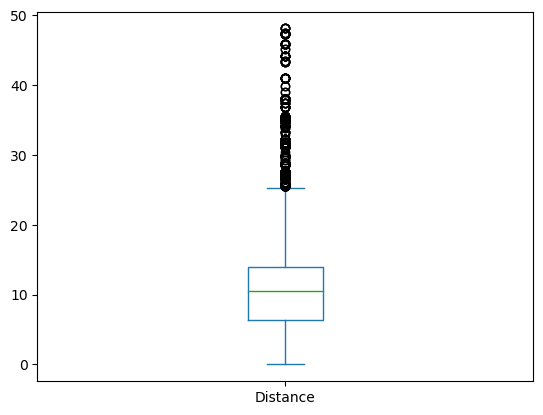

In [77]:
data.Distance.plot.box()

In [78]:
Q1 = data.Distance.quantile(0.25)
Q3 = data.Distance.quantile(0.75)
IQR = Q3-Q1
alt_sinir = Q1 - 1.5*IQR
üst_sinir = Q3 + 1.5*IQR

In [79]:
data[data.Distance<alt_sinir].Distance # alt sınırdan küçük olan distance verisi bulunmamaktadır alt sınırdan

Series([], Name: Distance, dtype: float64)

In [80]:
data[data.Distance>üst_sinir].Distance
#buradaki ifade incelendiğinde iş alanından (Central Business District) olan uzaklığı ifade ettiği farkedilmiş
#ve üst sınır değiştirilmemiştir. Verilerin bu şekilde olmasının daha sağlıklı olacağını düşünmekteyim


11102    35.2
11143    43.4
11155    34.7
11173    25.9
11174    27.0
         ... 
27207    44.2
27237    25.5
27238    25.5
27239    25.5
27240    25.5
Name: Distance, Length: 1188, dtype: float64

In [81]:
print('Landsize standart sapması:',data.Landsize.std())
print('Landsize ortalaması:',data.Landsize.mean())

Landsize standart sapması: 3757.2664286434383
Landsize ortalaması: 593.4889333778223


In [82]:
data[data.Landsize > data.Landsize.std()*3 ].Landsize     #3 standart sapma üstü verilere bakmak

919       75100.0
2717      15900.0
4781      15100.0
5033      37000.0
6010      21700.0
6650      41400.0
7132      14500.0
7141      17200.0
7257      17200.0
9864      15900.0
10462     21715.0
10645     17200.0
11749     37000.0
12847     38490.0
13421     14196.0
13444     76000.0
13818     17200.0
14044    433014.0
14447     40468.0
14629     16000.0
15344     17200.0
15659     12300.0
16008     20200.0
16203     14294.0
17657     44500.0
19094     21600.0
19416     89030.0
20339     40468.0
21040    146699.0
22453     40469.0
23830     15600.0
25196     40500.0
26631     42800.0
Name: Landsize, dtype: float64

In [83]:
data[data.Landsize < data.Landsize.std()*-3 ].Landsize 

Series([], Name: Landsize, dtype: float64)

In [84]:
data['Landsize'].fillna(data['Landsize'].mean(), inplace=True)

#data.dropna(subset=['Landsize'], inplace=True)
data.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize             0
BuildingArea     16591
YearBuilt        15163
CouncilArea          0
Lattitude         6254
Longtitude        6254
Regionname           0
Propertycount        3
dtype: int64

In [85]:
z = np.abs(stats.zscore(data.Landsize))
print(z)

0        0.128263
1        0.143333
2        0.150541
3        0.163646
4        0.155128
           ...   
27242    0.000160
27243    0.162336
27244    0.122365
27245    0.000000
27246    0.112536
Name: Landsize, Length: 27247, dtype: float64


In [86]:
data[data.BuildingArea > data.BuildingArea.std()*3 ].BuildingArea 

1940      6791.0
2101      3112.0
2901      1561.0
3269      3558.0
17657    44515.0
26127     6178.0
Name: BuildingArea, dtype: float64

In [87]:
data[data.BuildingArea < data.BuildingArea.std()*-3 ].BuildingArea 

Series([], Name: BuildingArea, dtype: float64)

In [88]:
data['BuildingArea'].fillna(data['BuildingArea'].mean(), inplace=True)
#data.dropna(subset=['BuildingArea'], inplace=True)
data.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize             0
BuildingArea         0
YearBuilt        15163
CouncilArea          0
Lattitude         6254
Longtitude        6254
Regionname           0
Propertycount        3
dtype: int64

In [89]:
z = np.abs(stats.zscore(data.BuildingArea))
print(z)

0        1.011745e-16
1        2.770725e-01
2        2.432949e-02
3        1.011745e-16
4        5.280758e-02
             ...     
27242    1.011745e-16
27243    1.880785e-01
27244    1.311223e-01
27245    1.011745e-16
27246    1.916383e-01
Name: BuildingArea, Length: 27247, dtype: float64


In [90]:
data.Suburb.value_counts()

Reservoir          727
Bentleigh East     493
Richmond           439
Preston            415
Brunswick          387
                  ... 
croydon              1
Tecoma               1
Cranbourne East      1
Yarra Glen           1
Kalkallo             1
Name: Suburb, Length: 345, dtype: int64

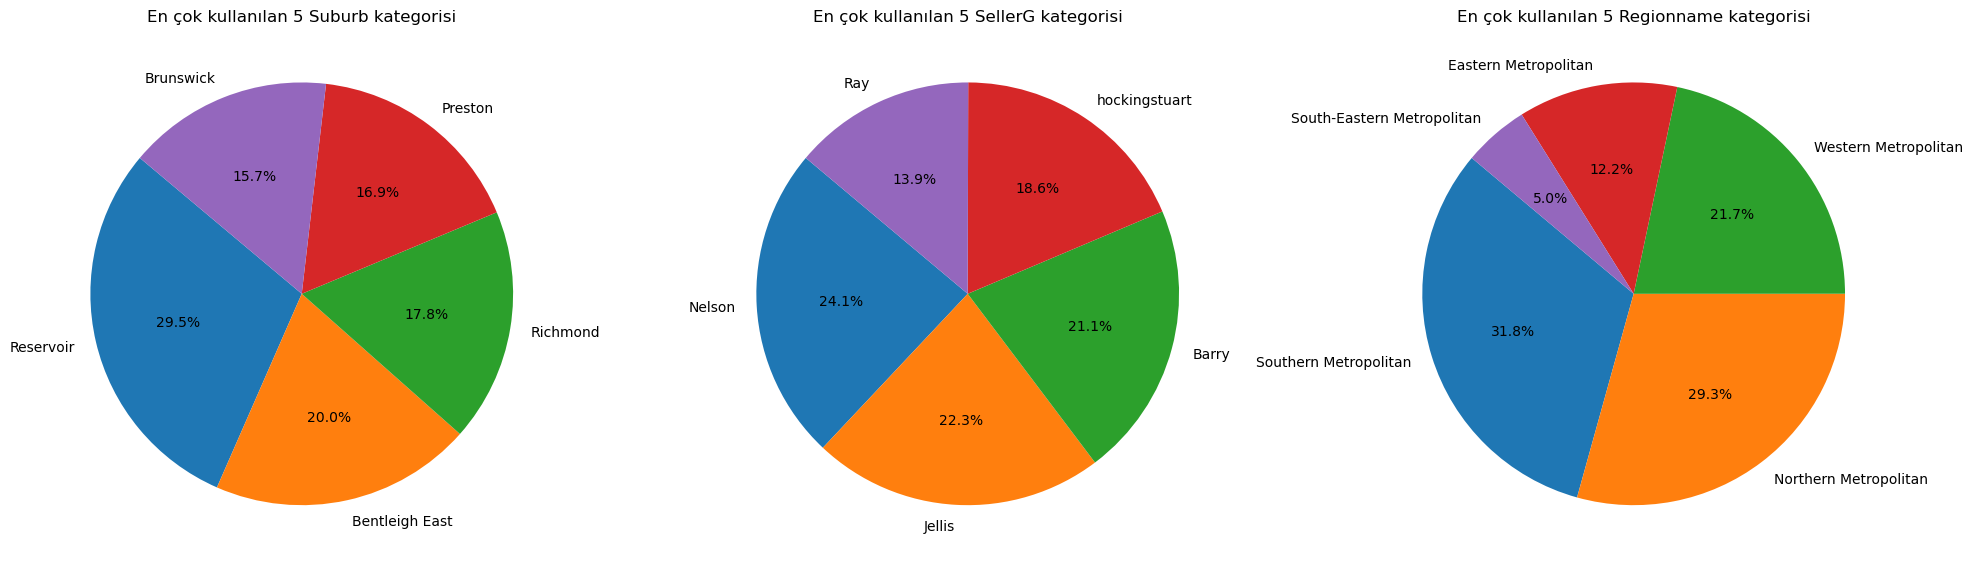

In [91]:
katorogiler = ['Suburb','SellerG','Regionname']

top_n = 5

fig, axs = plt.subplots(1, 3, figsize=(20, 10))

for i, column in enumerate(katorogiler):
    value_counts = data[column].value_counts().nlargest(top_n)
    axs[i].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'En çok kullanılan {top_n} {column} kategorisi')

plt.tight_layout()
plt.show()

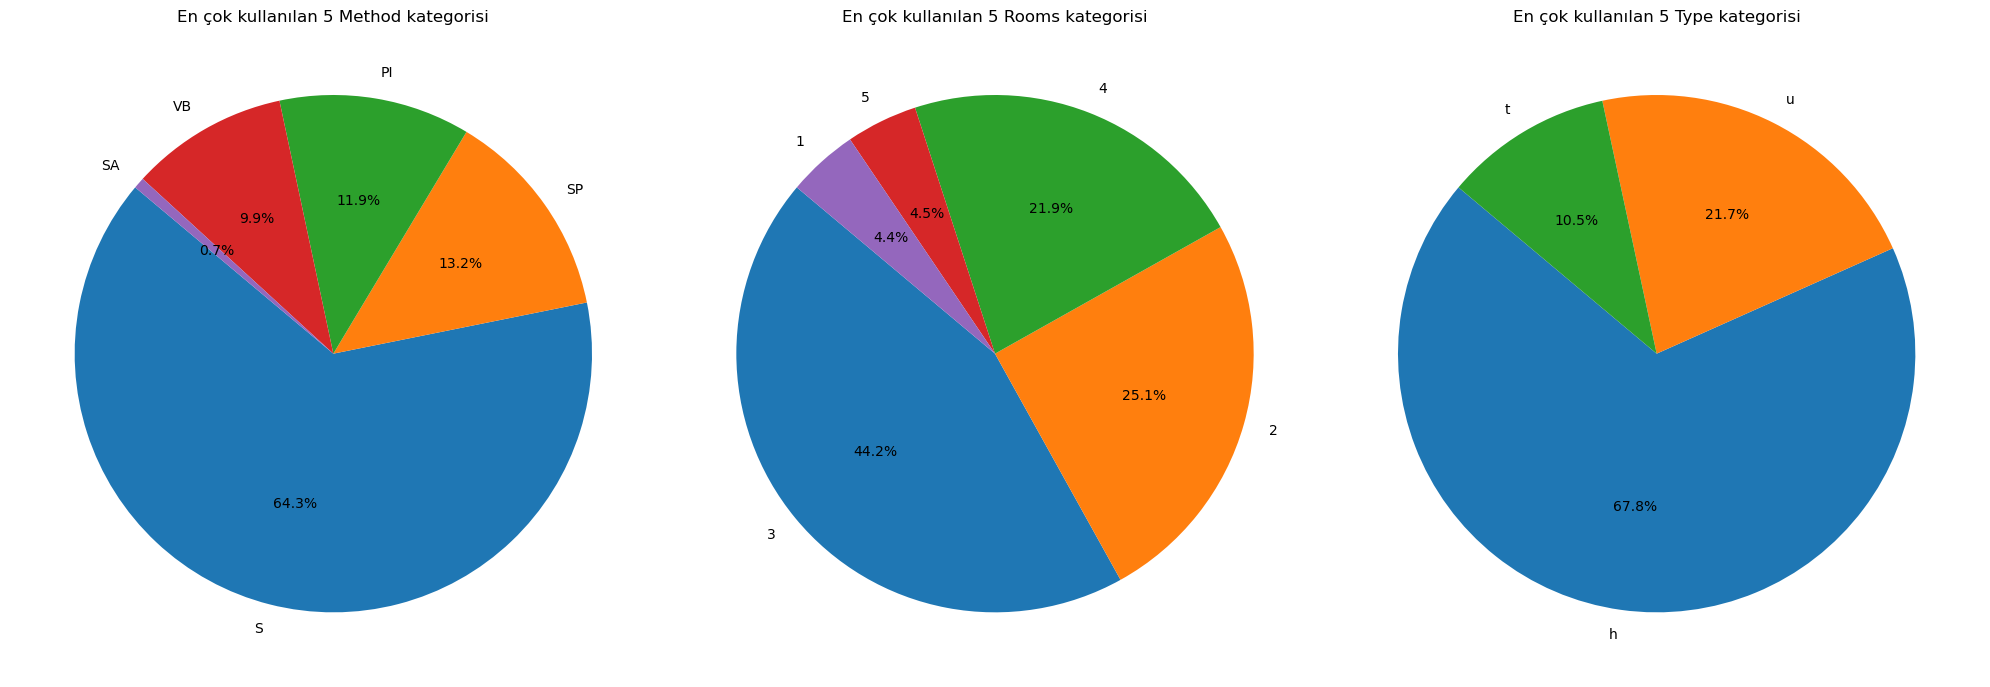

In [92]:
katorogiler = ['Method', 'Rooms','Type']

top_n = 5

fig, axs = plt.subplots(1, 3, figsize=(20, 10))

for i, column in enumerate(katorogiler):
    value_counts = data[column].value_counts().nlargest(top_n)
    axs[i].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'En çok kullanılan {top_n} {column} kategorisi')

plt.tight_layout()
plt.show()

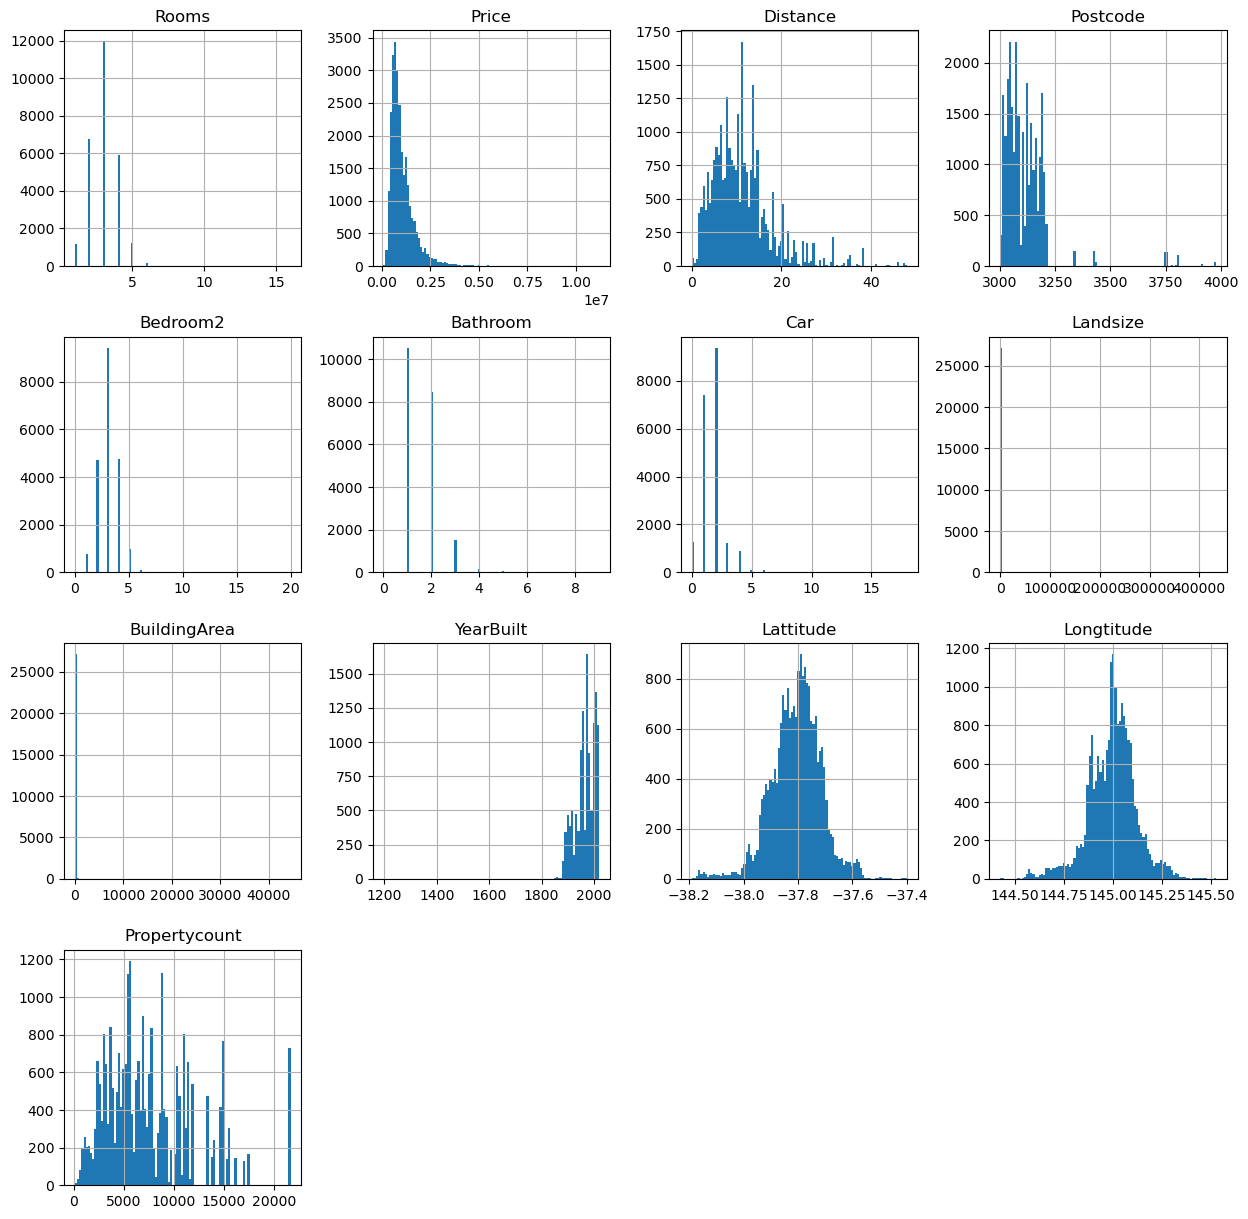

In [93]:
data.hist(bins=100, figsize=(15,15))
plt.show;

In [94]:
methodmapping = {
    'S':1,
    'SP':2,
    'PI':3,
    'VB':4,
    'SA':5,    }

data.Method= data.Method.map(methodmapping)

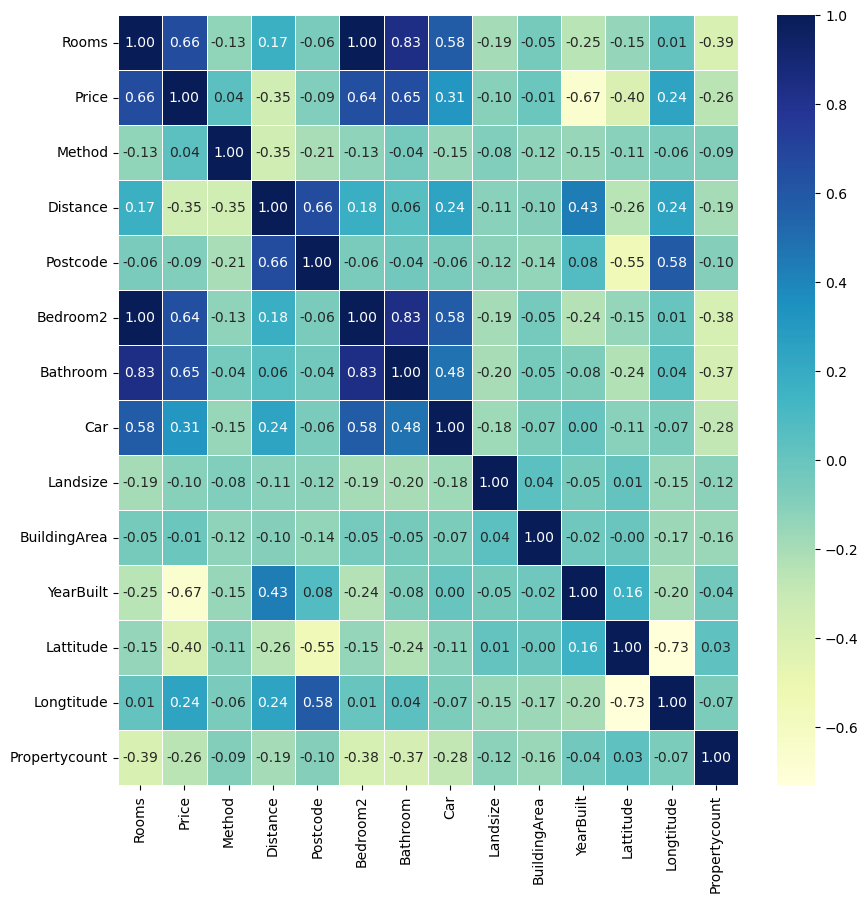

In [95]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10, 10))
sns.heatmap(corr.corr(),cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5);

In [96]:
min_value = data['Car'].min()
data['Car'] = data['Car'].fillna(min_value)

In [97]:
mean_value = data.YearBuilt.mean()
data['YearBuilt'] = data['YearBuilt'].fillna(mean_value)

In [100]:
data.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
SellerG          0
Date             0
Distance         1
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Regionname       0
Propertycount    3
dtype: int64

In [99]:
data.drop('Postcode' , axis = 1 , inplace = True)
data.drop('Method' , axis = 1 , inplace = True)
data.drop('Longtitude' , axis = 1 , inplace = True)
data.drop('Lattitude' , axis = 1 , inplace = True)
data['BuildingArea'].fillna(data['BuildingArea'].mean(), inplace=True)
data['Bedroom2'].fillna(data['Bedroom2'].median(), inplace=True)
data['Bathroom'].fillna(data['Bathroom'].median(), inplace=True)

In [101]:
data.dropna(inplace= True)
data.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
SellerG          0
Date             0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [102]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error

In [103]:
Y = data.Price
data.drop('Price' , axis = 1 , inplace = True)


In [104]:
le = LabelEncoder()

In [105]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'SellerG', 'Date', 'Distance',
       'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Regionname', 'Propertycount'],
      dtype='object')

In [106]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

In [107]:
train = data

In [108]:
X_train, X_test, y_train, y_test = train_test_split(train, Y, test_size=0.15, random_state=0)

DecisionTreeRegressor ile deneme parametre ayarsız

In [109]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [110]:
y_pred = model.predict(X_test)

In [111]:
r2 = r2_score(y_test, y_pred)
print('R2 Skoru:', r2)

R2 Skoru: 0.5604877719900365


In [112]:
from sklearn.model_selection import GridSearchCV
'''parametre_denemeleri = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
} '''



"parametre_denemeleri = {\n    'criterion': ['squared_error', 'absolute_error'],\n    'max_depth': [None, 5, 10, 15],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4]\n} "

parametre denemesi ilk seferinden sonra zaman kazanmak amacıyla bu şekilde değiştirilmiştir.

In [113]:
eniyi_parametreler = {
    'criterion': ['squared_error'],
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [4]
}

In [114]:
grid_search = GridSearchCV(model, eniyi_parametreler, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'], 'max_depth': [10],
                         'min_samples_leaf': [4], 'min_samples_split': [10]})

In [115]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("En iyi parametreler:", best_params)
print("En iyi skor (R^2):", best_score)

En iyi parametreler: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
En iyi skor (R^2): 0.684021192068446


In [116]:
model = DecisionTreeRegressor(criterion= 'squared_error',
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [117]:
y_pred = model.predict(X_test)

In [118]:
r2 = r2_score(y_test, y_pred)
print('R2 Skoru:', r2)

R2 Skoru: 0.6758175107723237


In [119]:
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [120]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [121]:
y_pred = model.predict(X_test)

In [122]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

Mean Squared Error: 101565118882.17


In [123]:
r2 = r2_score(y_test, y_pred)
print('R2 Skoru:', r2)

R2 Skoru: 0.7558183387042513


In [124]:

train_accuracy = model.score(X_train, y_train)

test_accuracy = model.score(X_test, y_test)

train_loss = mean_squared_error(y_train, model.predict(X_train))
test_loss = mean_squared_error(y_test, model.predict(X_test))

print("Eğitim Doğruluğu:", train_accuracy)
print("Test Doğruluğu:", test_accuracy)
print("Eğitim Hatası:", train_loss)
print("Test Hatası:", test_loss)
#overfitting var gibi gözüküyor

Eğitim Doğruluğu: 0.9666839543749011
Test Doğruluğu: 0.7558183387042513
Eğitim Hatası: 13683004290.93454
Test Hatası: 101565118882.17247


In [125]:
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train, y_train)

train_loss_ridge = mean_squared_error(y_train, ridge_model.predict(X_train))
test_loss_ridge = mean_squared_error(y_test, ridge_model.predict(X_test))

print("Ridge Eğitim Hatası:", train_loss_ridge)
print("Ridge Test Hatası:", test_loss_ridge)

Ridge Eğitim Hatası: 221655175669.21414
Ridge Test Hatası: 419252124114.5849


In [126]:
from catboost import CatBoostRegressor

In [127]:
model = CatBoostRegressor(task_type="GPU", verbose=1000,early_stopping_rounds=50 , iterations=10000 , max_depth=12, random_seed=0)

In [128]:
model.fit(X_train , y_train)

Learning rate set to 0.01542
0:	learn: 634556.3140467	total: 266ms	remaining: 44m 23s
1000:	learn: 271638.9547952	total: 2m 18s	remaining: 20m 48s
2000:	learn: 257346.2813623	total: 3m 59s	remaining: 15m 56s
3000:	learn: 252782.2603657	total: 4m 46s	remaining: 11m 8s
4000:	learn: 251193.7155325	total: 5m 18s	remaining: 7m 57s
5000:	learn: 247252.5058444	total: 6m 23s	remaining: 6m 23s
6000:	learn: 243010.3905828	total: 7m 31s	remaining: 5m
7000:	learn: 241297.6881098	total: 8m 18s	remaining: 3m 33s
8000:	learn: 240417.1387282	total: 8m 59s	remaining: 2m 14s
9000:	learn: 237099.4719739	total: 10m 9s	remaining: 1m 7s
9999:	learn: 233560.9364127	total: 11m 41s	remaining: 0us


In [129]:
accuracy = model.score(X_test, y_test)
print(accuracy)


r2 = r2_score(y_test, model.predict(X_test,prediction_type='RawFormulaVal'))
print('R2 Skoru:', r2)


0.7864316696797249
R2 Skoru: 0.7864316696797249


In [130]:
train_accuracy = model.score(X_train, y_train)

test_accuracy = model.score(X_test, y_test)

train_loss = mean_squared_error(y_train, model.predict(X_train))
test_loss = mean_squared_error(y_test, model.predict(X_test))

print("Eğitim Doğruluğu:", train_accuracy)
print("Test Doğruluğu:", test_accuracy)
print("Eğitim Hatası:", train_loss)
print("Test Hatası:", test_loss)

Eğitim Doğruluğu: 0.8671774490866538
Test Doğruluğu: 0.7864316696797249
Eğitim Hatası: 54550637687.65604
Test Hatası: 88831785087.14433


In [134]:
ridge_model = Ridge(alpha=1)  # Alpha değeri artırarak regülarizasyon uygulayabilirsiniz
ridge_model.fit(X_train, y_train) 
# bu da aşırı uydurmayı (overfitting) azaltmaya yardımcı olan bir düzenleme (regülarizasyon) yöntemi 
#olan L2 düzenlemesi kullanır.

Ridge(alpha=1)

In [135]:
train_loss_ridge = mean_squared_error(y_train, ridge_model.predict(X_train))
test_loss_ridge = mean_squared_error(y_test, ridge_model.predict(X_test))

print("Ridge Eğitim Hatası:", train_loss_ridge)
print("Ridge Test Hatası:", test_loss_ridge)

Ridge Eğitim Hatası: 221655175669.21414
Ridge Test Hatası: 419252124114.5849


In [136]:
print('Train Değişim:',train_loss - train_loss_ridge)
print('Test Değişim:',test_loss - test_loss_ridge)

Train Değişim: -167104537981.5581
Test Değişim: -330420339027.44055
